<a href="https://colab.research.google.com/github/mayur7garg/66DaysOfData/blob/main/Day%2012/Filter_and_Feature_map_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filter and Feature map visualization for CNNs

## Imports

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from matplotlib import pyplot as plt

## Loading the pretrained VGG16 model

In [2]:
model = VGG16()
model.summary()

553467904/553467096 [==============================] - 258s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
__________________________________________________________

## Details of CNN layers in VGG16

In [3]:
layer_names = []
kernel_shapes = []
filter_count = []
filter_param_shape = []
bias_param_shape = []
total_params = []

for layer in model.layers:
    if 'conv' not in layer.name:
        continue

    filters, biases = layer.get_weights()
    layer_names.append(layer.name)
    kernel_shapes.append(layer.kernel_size)
    filter_count.append(layer.filters)
    filter_param_shape.append(filters.shape)
    bias_param_shape.append(biases.shape)
    total_params.append(filters.size + biases.size)

conv_layers_df = pd.DataFrame({
    'Convulational Layer': layer_names,
    'Kernel Shape': kernel_shapes,
    'Count of Filers': filter_count,
    'Shape of Filter params': filter_param_shape,
    'Shape of Bias params': bias_param_shape,
    'Total parameters': total_params
})

conv_layers_df

,Convulational Layer,Kernel Shape,Count of Filers,Shape of Filter params,Shape of Bias params,Total parameters
0,block1_conv1,"(3, 3)",64,"(3, 3, 3, 64)","(64,)",1792
1,block1_conv2,"(3, 3)",64,"(3, 3, 64, 64)","(64,)",36928
2,block2_conv1,"(3, 3)",128,"(3, 3, 64, 128)","(128,)",73856
3,block2_conv2,"(3, 3)",128,"(3, 3, 128, 128)","(128,)",147584
4,block3_conv1,"(3, 3)",256,"(3, 3, 128, 256)","(256,)",295168
5,block3_conv2,"(3, 3)",256,"(3, 3, 256, 256)","(256,)",590080
6,block3_conv3,"(3, 3)",256,"(3, 3, 256, 256)","(256,)",590080
7,block4_conv1,"(3, 3)",512,"(3, 3, 256, 512)","(512,)",1180160
8,block4_conv2,"(3, 3)",512,"(3, 3, 512, 512)","(512,)",2359808
9,block4_conv3,"(3, 3)",512,"(3, 3, 512, 512)","(512,)",2359808


## Filter Visualization

### Extracting the filters of the first CNN layer and normalizing it

In [4]:
filters, biases = model.layers[1].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

### Visualizing all 3 channels of first 6 filters of first CNN layer

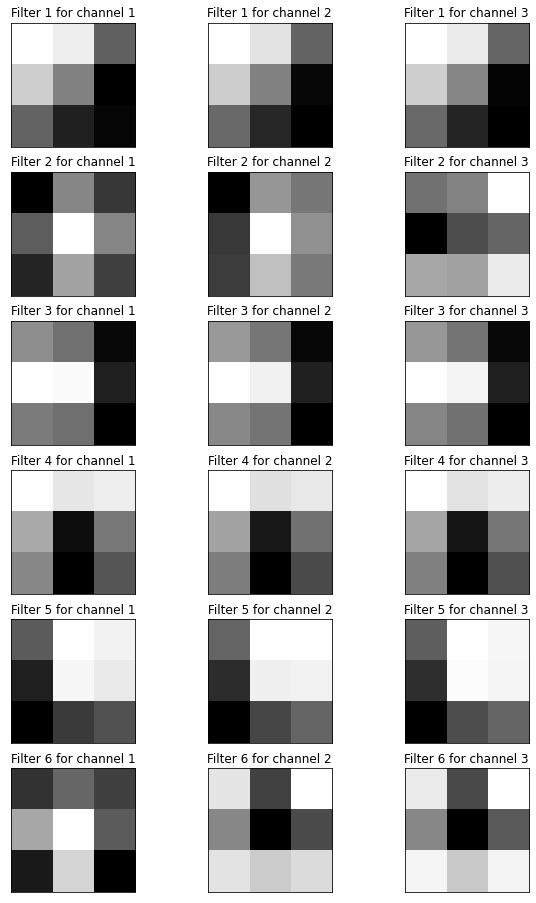

In [5]:
n_filters, ix = 6, 1
plt.figure(figsize = (10, 16))
for i in range(n_filters):
    f = filters[:, :, :, i]

    for j in range(3):
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.title(f'Filter {i + 1} for channel {j + 1}')
        plt.imshow(f[:, :, j], cmap = 'gray')
        ix += 1

plt.show()

## Feature Map visualization

### Loading a sample image

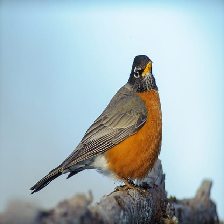

In [6]:
img = load_img(r'../Data/Images/bird.jpg', target_size=(224, 224))
img

### Preprocess the image so that it can be sent as an input to the VGG16 model

In [7]:
img = img_to_array(img)
img = np.expand_dims(img, axis = 0)
img = preprocess_input(img)
img.shape

(1, 224, 224, 3)

### Feature Maps of first CNN layer

#### Creating a model upto the first CNN layer

In [8]:
layer1_model = Model(inputs=model.inputs, outputs=model.layers[1].output)
layer1_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


#### Plotting the feature maps

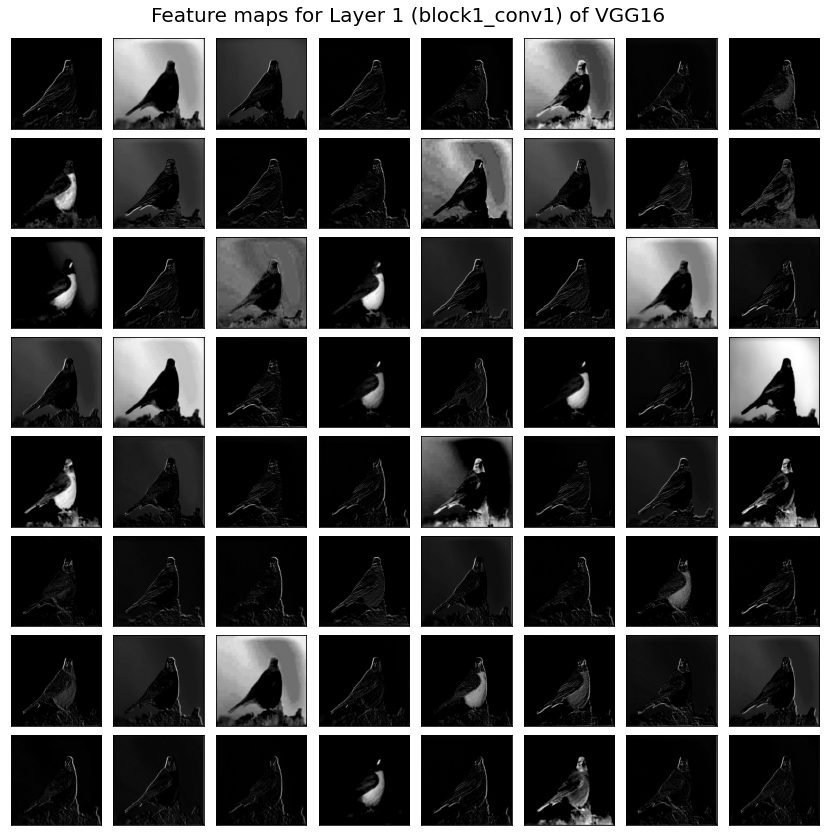

In [9]:
feature_maps = layer1_model.predict(img)

square = 8
ix = 1

plt.subplots(nrows = 8, ncols = 8, figsize = (12, 12))
plt.tight_layout(rect = [0, 0, 1, 0.96])
plt.suptitle(f'Feature maps for Layer 1 ({model.layers[1].name}) of VGG16', fontsize = 20)

for _ in range(square):
	for _ in range(square):
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		plt.imshow(feature_maps[0, :, :, ix-1], cmap = 'gray')
		ix += 1

plt.subplots_adjust(wspace = 0.1, hspace = 0.1)
plt.show()

### Feature Maps for second CNN layer

#### Creating a model upto the second CNN layer

In [10]:
layer2_model = Model(inputs=model.inputs, outputs=model.layers[2].output)
layer2_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


#### Plotting the feature maps

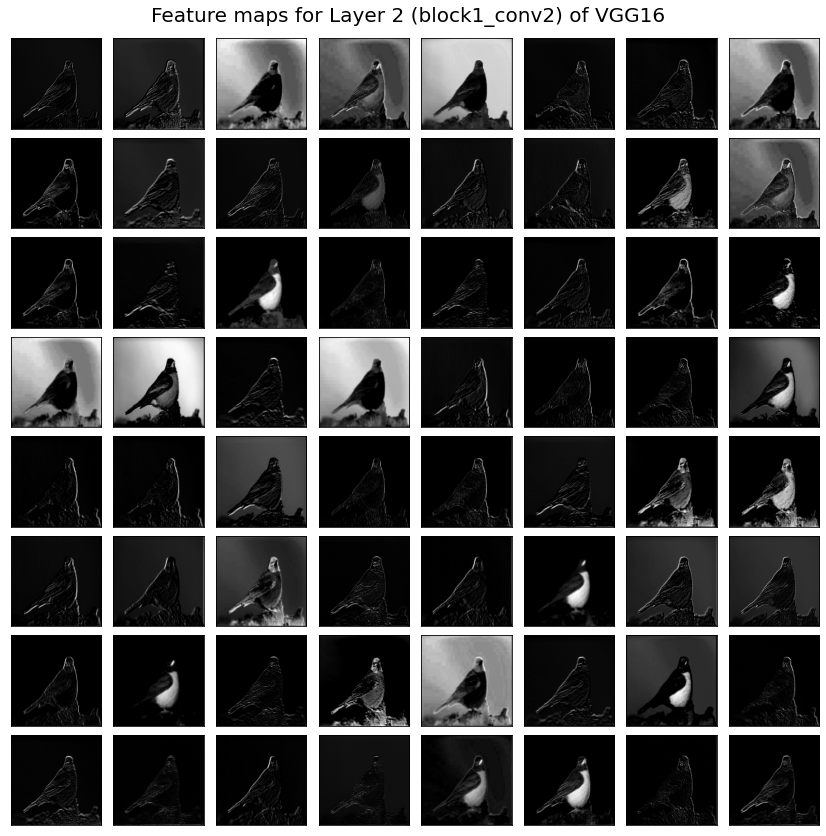

In [11]:
feature_maps = layer2_model.predict(img)

square = 8
ix = 1

plt.subplots(nrows = 8, ncols = 8, figsize = (12, 12))
plt.tight_layout(rect = [0, 0, 1, 0.96])
plt.suptitle(f'Feature maps for Layer 2 ({model.layers[2].name}) of VGG16', fontsize = 20)

for _ in range(square):
	for _ in range(square):
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		plt.imshow(feature_maps[0, :, :, ix-1], cmap = 'gray')
		ix += 1

plt.subplots_adjust(wspace = 0.1, hspace = 0.1)
plt.show()

### Feature Maps for first MaxPooling layer

#### Creating a model upto the first MaxPooling layer

In [12]:
layer3_model = Model(inputs=model.inputs, outputs=model.layers[3].output)
layer3_model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


#### Plotting the feature maps

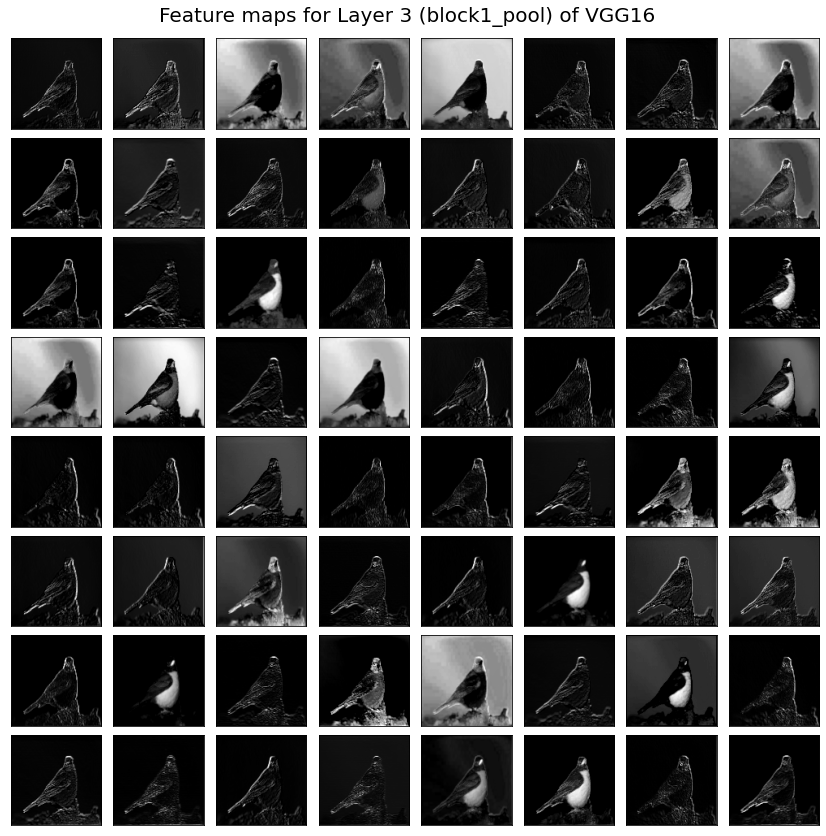

In [13]:
feature_maps = layer3_model.predict(img)

square = 8
ix = 1

plt.subplots(nrows = 8, ncols = 8, figsize = (12, 12))
plt.tight_layout(rect = [0, 0, 1, 0.96])
plt.suptitle(f'Feature maps for Layer 3 ({model.layers[3].name}) of VGG16', fontsize = 20)

for _ in range(square):
	for _ in range(square):
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		plt.imshow(feature_maps[0, :, :, ix-1], cmap = 'gray')
		ix += 1

plt.subplots_adjust(wspace = 0.1, hspace = 0.1)
plt.show()